In [7]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import *
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from time import time
import pickle

In [2]:
from xgboost import *

# data preparation

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "mkt_with_11_group_id_20170712.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False, nrows = 100)

In [ ]:
train_df['W2P_SMS_MO_ONNET_CNT'].dtypes

In [ ]:
train_df['W2P_SMS_MO_ONNET_CNT'].values
# train_df.groupby('BILL_DISTRICT_NAME').describe()

In [ ]:
X = train_df.values[:,:-1]
Y = train_df.values[:,-1]

In [ ]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [ ]:
label_encoded_y

# categorical feature encoding without one hot encode

In [3]:
sample = 0
group_name = 'Adult'
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0725_sample/" + group_name + "/"
filename = "0725_april_marketing_anylze_select_294_table_group11_max_min_sample_" + group_name + "_others_" + str(sample) + ".csv"
# filename = "0719_april_marketing_anylze_full_table_group11_max_min_train.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False)

In [4]:
# train_df = train_df[train_df['Groups'] != 'Infrequent_User']

train_df.groupby('Groups').count()

,DATA_MONTH,RENEW_IND,GA_IND,ACTV_TYPE,GA_DATE,CHURN_IND,CHURN_TYPE,INACTV_DATE,MKT_CHURN_DATE,SUSPEND_IND,...,L2M_DEVICE_MODEL,L2M_DEVICE_PRICE_TIER,L2M_DEVICE_TYPE,HS_CHG_CNT,AVG_HS_USE_MONTH,AVG_HS_USE_MONTH_EX_CURR,ZONE_ACTV_IVR_COUNTRY,ZONE_ACTV_IVR_REGION,STORE_TYPE,SPAUTH_IND
Groups,,,,,,,,,,,,,,,,,,,,,
Adult,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309,...,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309
Others,54306,54306,54306,54306,54306,54306,54306,54306,54306,54306,...,54306,54306,54306,54306,54306,54306,54306,54306,54306,54306


In [ ]:
train_df["INACTV_DATE"].head()

In [ ]:
for c in train_df.columns:
    l = len(train_df[c].value_counts())
    if l > 1000:
        print(c)
        print(l)
        
# 

In [ ]:
np.max(train_df['CURR_BILL_PLAN_START_DATE'].values)
# train_df.columns.values

In [16]:
X_train = train_df.iloc[:, 0:-1].values
y_train = train_df.iloc[:, -1].values

In [17]:
param_grid = {
#     'max_depth':[3, 5],
#     'learning_rate':[0.1, 0.05, 0.2],
#     'n_estimators':[50, 100, 200]
#     'max_depth':[10],
#     'learning_rate':[0.05],
    'n_estimators':[100],
    'max_depth':[5],
    'min_child_weight':[7]
}


In [18]:
t0 = time()
# model = XGBClassifier(n_jobs = -1, **{"updater": "grow_gpu"})
model = XGBClassifier(n_jobs = -1)
# kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
gs.fit(X_train, y_train)
print("training time:  %.2f" % (time()-t0))

training time:  169.76


In [15]:
import requests
requests.post(
        "https://api.mailgun.net/v3/sandboxe9bb891a60414f4bae93f2cc55daa963.mailgun.org/messages",
        auth=("api", "key-a007a22faf334a3510137b6cc03c21a6"),
        data={"from": "Mailgun Sandbox <postmaster@sandboxe9bb891a60414f4bae93f2cc55daa963.mailgun.org>",
              "to": "Toby <atch84@gmail.com>",
              "subject": "XGBoost Result",
              "text": str(gs.cv_results_)})

<Response [200]>

In [19]:
print(gs.best_score_)
print(gs.best_params_)
best_model = gs.best_estimator_

0.68311006767
{'min_child_weight': 7, 'n_estimators': 100, 'max_depth': 5}


In [20]:
gs.cv_results_

{'mean_fit_time': array([ 26.61041493]),
 'mean_score_time': array([ 0.16042638]),
 'mean_test_score': array([ 0.68311007]),
 'mean_train_score': array([ 0.71526489]),
 'param_max_depth': masked_array(data = [5],
              mask = [False],
        fill_value = ?),
 'param_min_child_weight': masked_array(data = [7],
              mask = [False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [100],
              mask = [False],
        fill_value = ?),
 'params': ({'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100},),
 'rank_test_score': array([1]),
 'split0_test_score': array([ 0.69071073]),
 'split0_train_score': array([ 0.71350312]),
 'split1_test_score': array([ 0.71942181]),
 'split1_train_score': array([ 0.70854624]),
 'split2_test_score': array([ 0.73231138]),
 'split2_train_score': array([ 0.7041845]),
 'split3_test_score': array([ 0.65985361]),
 'split3_train_score': array([ 0.72155089]),
 'split4_test_score': array([ 0.61324924]),
 'split4_trai

In [ ]:
model = XGBClassifier(n_jobs = -1, **{"updater": "grow_gpu"})
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
t0 = time()
model = XGBClassifier(n_jobs = -1)
model.fit(X_train, y_train)
# result =  cross_val_score(model,  X_train, y_train, cv=kfold, n_jobs=-1)
print("training time: %.2f" % (time()-t0))

In [ ]:
result

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "0719_april_marketing_anylze_full_table_group11_max_min_test.csv"
test_df = pd.read_csv(path + filename, error_bad_lines=False)

In [ ]:
X_test = test_df.iloc[:, 0:-1].values
y_test = test_df.iloc[:, -1].values

In [21]:
pred = best_model.predict(X_train)

In [22]:
accuracy = accuracy_score(y_train, pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 71.16%


In [ ]:
pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

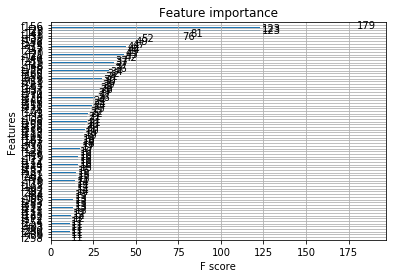

In [23]:
plot_importance(best_model, max_num_features = 80)
pyplot.show()

In [ ]:
import winsound
winsound.PlaySound('crows.wav', winsound.SND_FILENAME)

In [ ]:
test_df.columns[166]

In [28]:
col_rank = pd.DataFrame()


col_rank['importance'] = best_model.feature_importances_
col_rank.index = train_df.columns[:-1]

col_rank = col_rank.sort_values('importance', ascending = False)

In [29]:
# np.sum(col_rank['importance'].values) -> 1.0
# np.sum(col_rank['importance'].values[:84])
importance_sum = 0
for i in range(len(col_rank['importance'])):
    importance_sum += col_rank['importance'].values[i]
    if importance_sum > 0.8:
        print(importance_sum, i)
        break

0.802573546767 73


In [30]:
col_rank.iloc[:50]

,importance
DATA_USAGE_MB,0.065809
IMEI_MKT_NAME,0.045221
IMEI_MFG_NAME,0.045221
L6M_AVG_VAS_MB,0.029779
IMEI_SMART_OS_FLAG,0.027941
MT_PSTN_DUR,0.019118
L2M_DATA_USAGE_MB,0.018015
CURR_DEVICE_MAKER,0.017279
DATA_RATING_USAGE_MB,0.016176
GENDER_CODE,0.016176


In [13]:
col_rank.iloc[50:100]

,column_name,importance
50,ANOTHER_ACTIVE_VD,0.006667
51,ANOTHER_ACTIVE_D,0.000000
52,PTY_NP_IN_IND,0.000000
53,PTY_NP_OUT_IND,0.000000
54,PTY_CBU_EBU_PO_CNT,0.000000
55,PTY_CBU_PO_CNT,0.000000
56,PTY_CBU_PO_V_CNT,0.000000
57,PTY_CBU_PO_VD_CNT,0.000000
58,PTY_CBU_PO_D_CNT,0.000000
59,PTY_EBU_PO_CNT,0.000000


In [32]:
pd.DataFrame(best_model._Booster.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

ValueError: DataFrame constructor not properly called!

## save model

In [8]:
path = './XGB_models/'
model_name = 'xgboost_without_infre_adult_' + str(sample) + '_0725'

In [6]:
best_model._Booster.save_model(path + model_name + '.model')

pickle.dump(best_model, open(path + model_name + ".dat", "wb"))

In [55]:
col_rank.to_csv(path + model_name + ".csv", index=False, encoding='utf-8')

## load model

In [14]:
best_model = XGBClassifier()
booster = Booster()
booster.load_model(path + model_name + '.model')
best_model._Booster = booster

In [9]:
import pickle
best_model = pickle.load(open(path + model_name + ".dat", "rb"))

In [15]:
best_model._Booster.get_fscore()

{'f0': 113,
 'f1': 1,
 'f10': 1,
 'f113': 2,
 'f12': 2,
 'f15': 1,
 'f151': 1,
 'f16': 1,
 'f161': 1,
 'f167': 1,
 'f168': 1,
 'f173': 1,
 'f18': 1,
 'f183': 1,
 'f20': 1,
 'f214': 1,
 'f26': 2,
 'f27': 1,
 'f271': 1,
 'f43': 1,
 'f45': 1,
 'f47': 1,
 'f50': 1,
 'f6': 1,
 'f67': 1,
 'f74': 1,
 'f8': 2,
 'f81': 2,
 'f82': 1,
 'f83': 1,
 'f86': 1,
 'f88': 1,
 'f89': 1}

In [ ]:
plot_importance(clf, max_num_features = 20)
pyplot.show()

In [ ]:
pred = loaded_model.predict(X_train)

In [56]:
# labels = ['Adult', 'Game', 'HomeLife', 'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News', 'No_ignificant_preference', 'Portal', 'Social-media']
labels = train_df['Groups'].unique()
cnf_matrix = confusion_matrix(y_train, pred, labels=labels)
cnf_matrix

array([[39800, 14509],
       [16785, 37521]])

In [57]:
cnf_pd = pd.DataFrame(cnf_matrix)
cnf_pd.columns = labels
cnf_pd.index = labels
cnf_pd

,Adult,Others
Adult,39800,14509
Others,16785,37521


In [26]:
del train_df
del X_train

In [ ]:
del X

In [ ]:
import os
os.system('python XGBoost_date_to_num.py')

In [41]:
train_df.columns[:30]

Index(['DATA_MONTH', 'RENEW_IND', 'GA_IND', 'ACTV_TYPE', 'GA_DATE',
       'CHURN_IND', 'CHURN_TYPE', 'INACTV_DATE', 'MKT_CHURN_DATE',
       'SUSPEND_IND', 'TARGET_OPR_ID', 'TEMP_INACTV_DATE', 'SRV_TYPE_DESC',
       'RPS_NAME', 'SUBSCR_STATUS_CODE', 'GENDER_CODE', 'P6M_AVG_NET_INV_AMT',
       'ORIG_OPR_ID', 'AGE', 'TENURE_SCV', 'BILL_CITY_NAME',
       'BILL_DISTRICT_NAME', 'CHANNEL_CHURN_INDEX', 'CHURN_INDEX',
       'FETNET_IND', 'DORMANT_MONTH_CNT_MKT', 'SMS_PROM_IND', 'IMEI_TYPE',
       'IMEI_MFG_NAME', 'IMEI_MKT_NAME'],
      dtype='object')

In [55]:
np.mean([1, 2, 3])

2.0

In [57]:
train_df.mean(axis = 1)

0         0.071200
1         0.077995
2         0.076076
3         0.084357
4         0.087713
5         0.102503
6         0.076637
7         0.075904
8         0.078638
9         0.107031
10        0.069363
11        0.089462
12        0.083224
13        0.093962
14        0.092212
15        0.076305
16        0.092712
17        0.089767
18        0.067652
19        0.079278
20        0.097193
21        0.072422
22        0.089958
23        0.083587
24        0.075730
25        0.086533
26        0.076192
27        0.080760
28        0.080117
29        0.087279
            ...   
108585    0.069299
108586    0.078080
108587    0.114596
108588    0.099239
108589    0.073038
108590    0.081312
108591    0.068605
108592    0.122377
108593    0.082526
108594    0.111087
108595    0.086701
108596    0.087570
108597    0.093813
108598    0.078654
108599    0.098765
108600    0.089876
108601    0.115582
108602    0.093408
108603    0.109350
108604    0.078123
108605    0.075659
108606    0.